In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.linalg as la

### Problem 1a- Leslie Matrices

In [3]:
n_zero=np.array([100,100,100, 100])
A_mat=np.array([[0, 1, 5, 0.5], [0.5, 0, 0, 0], [0, 0.9, 0, 0], [0, 0, 0.95, 0]])

In [4]:
Tmax = 500
n_vs_t = np.zeros([4, Tmax])

n_vs_t[:, 0]  = n_zero

In [5]:
print(n_vs_t[:,0])
print(A_mat)
np.dot(A_mat,n_vs_t[:,0])

[100. 100. 100. 100.]
[[0.   1.   5.   0.5 ]
 [0.5  0.   0.   0.  ]
 [0.   0.9  0.   0.  ]
 [0.   0.   0.95 0.  ]]


array([650.,  50.,  90.,  95.])

In [6]:
iter_arr=np.arange(Tmax-1)

for t in iter_arr:
    n_vs_t[:,t+1]=np.dot(A_mat,n_vs_t[:,t])

In [7]:
print(n_vs_t.shape)
print(iter_arr.shape)

(4, 500)
(499,)


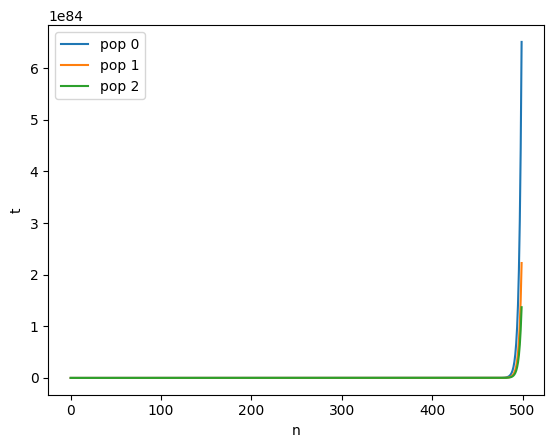

In [8]:
generation_arr=np.arange(Tmax)
plt.plot(generation_arr,n_vs_t[0,:],label="pop 0")
plt.plot(generation_arr,n_vs_t[1,:],label="pop 1")
plt.plot(generation_arr,n_vs_t[2,:],label="pop 2")
plt.xlabel('n')
plt.ylabel('t')

plt.legend()

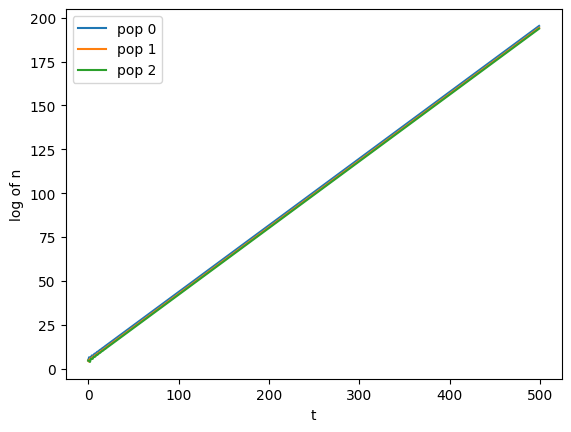

In [9]:
plt.plot(generation_arr,np.log(n_vs_t[0,:]),label="pop 0")
plt.plot(generation_arr,np.log(n_vs_t[1,:]),label="pop 1")
plt.plot(generation_arr,np.log(n_vs_t[2,:]),label="pop 2")
plt.xlabel('t')
plt.ylabel('log of n')
plt.legend()

In [10]:
generation_arr_after_squiggles=np.arange(25,Tmax)

p=np.polyfit(generation_arr_after_squiggles,np.log(n_vs_t[0,generation_arr_after_squiggles]),1)
lambda_Leslie=np.exp(p[0])

print(p)
print(lambda_Leslie)

[0.38006246 5.63879758]
1.4623759212863747


### Problem 1b- Euler Lotke Formula

In [11]:
def eulot_func(lam,Ia_arr,fa_arr):
        """compute the Euler-Lotka sum, taking as arguments a scalar and two 1-D numpy arrays"""
        length_of_array=Ia_arr.size
        age_arr=np.arange(0,length_of_array)
        temp_arr=lam**(-(age_arr+1))*Ia_arr*fa_arr 
        return sum(temp_arr) -1 

In [12]:
p = np.array([0.5, 0.9, 0.95])  # survival probabilities p0, p1, p2
fa_arr = np.array([0, 1, 5, 0.5])

Ia_arr = np.array([0, p[0], p[0] * p[1], p[0] * p[1] * p[2]])

lambda_min = 0.5
lambda_max = 5
lambda_arr=np.linspace(lambda_min,lambda_max,100) 

G_arr=np.zeros(lambda_arr.size)

iter_arr=np.arange(lambda_arr.size)

for j in iter_arr:
    G_arr[j]=eulot_func(lambda_arr[j],Ia_arr,fa_arr) 

Text(0, 0.5, 'G')

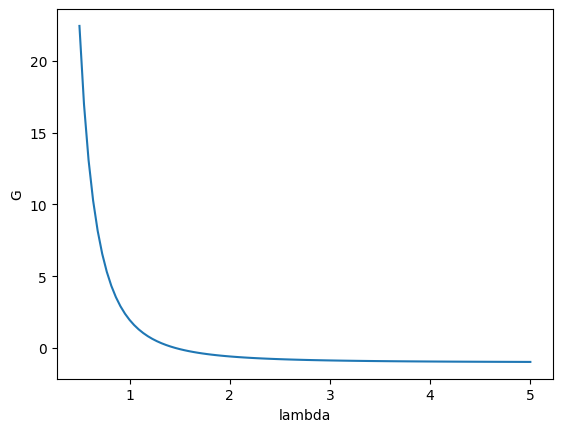

In [13]:
plt.plot(lambda_arr,G_arr)
plt.xlabel('lambda')
plt.ylabel('G')

In [14]:
#search for root between left_bracket and right_bracket
left_bracket=0.1
right_bracket=2

#The first argument of eulot_func is variable we want to solve with respect to.  
#The next arguments are parameters, which we pass like this:
args=(Ia_arr,fa_arr)

lambda_EL = opt.brentq(eulot_func,left_bracket,right_bracket,args)

In [15]:
print('Lambda value from Leslie Matrix', lambda_Leslie)
print('Lambda value from Euler- Lotke', lambda_EL)
print('Difference between predictions of Lambda = ', np.abs(lambda_EL - lambda_Leslie))

Lambda value from Leslie Matrix 1.4623759212863747
Lambda value from Euler- Lotke 1.4623759092509627
Difference between predictions of Lambda =  1.2035412000344081e-08


### Question 2a- Growth Rates

With the cumulative product of P0P1P2 = 0.0722, we are able to use the Euler-Lotka equation to calculate the appropriate long-term population growth rate. This is because the survival probabilities for successive age classes combine multiplicatively to determine the probability of reaching age 3, and as long as the product remains the same, the total number of individuals surviving to age 3 will be the same no matter the individual values of P0, P1, and P2. Additionally, the Euler- Lotka equation is more concerned with the overall survival to reproductive ages and rate itself. Since survival to age 3 is represented as a single variable I3, any changes in the invidiual surivval probabilities that do not affect I3 will not change the long-term growth rate. 

CORRECT ANSWER: "The critical reason is that the fecundities are 0 for a<3"

### Question 2b- Projection Matrix 

In [71]:
A = 50  # Maximum age
f = 0.24  # Fecundity for ages >= 3
survival_to_age3 = 0.0722  # Survival to age 3
p_adult = 0.942  # Survival for ages 3 to 49

P = np.zeros((A + 1, A + 1))
P[0, 3:] = f 

P[1, 0] = survival_to_age3 
P[2, 1] = 1   
P[3, 2] = 1  

for a in range(3, A):
    P[a + 1, a] = p_adult

print(P)

[[0.    0.    0.    ... 0.24  0.24  0.24 ]
 [0.072 0.    0.    ... 0.    0.    0.   ]
 [0.    1.    0.    ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.942 0.    0.   ]
 [0.    0.    0.    ... 0.    0.942 0.   ]]


### Question 2c- Long term Growth Rate

In [72]:
eigenvalues, eigenvectors = np.linalg.eig(P)
lambda_long_term = max(eigenvalues.real)
print(f"Long-term population growth rate (λ): {lambda_long_term:.4f}")

Long-term population growth rate (λ): 0.9439
